In [1]:
%load_ext autoreload
%autoreload 2
# import sys
# sys.path.insert(0,'../')
from draw_rna.ipynb.draw import draw_struct
import numpy as np
import matplotlib.pyplot as plt

from linear_partition import (
    BeamCKYParser,
    PairProb_MEA, 
    dump_forest, 
    output_bpp_to_file,
    output_bpseq,
    dotbracket_to_pairs, 
    threshknot_pairs, 
    kT)

# seq = 'GCGGGAAUAGCUCAGUUGGUAGAGCACGACCUUGCCAAGGUCGGGGUCGCGAGUUCGAGUCUCGUUUCCCGCUCCA'
# struct = '(((((((..((((........)))).(((((((((....).))))))))((((.......)))).)))))))....'
# draw_struct(seq, struct)

Free Energy of Ensemble: -74.67681157020657 kcal/mol
GCGGGAAUAGCUCAGUUGGUAGAGCACGACCUUGCCAAGGUCGGGGUCGCGAGUUCGAGUCUCGUUUCCCGCUCCAGCGGGAAUAGCUCAGUUGGUAGAGCACGACCUUGCCAAGGUCGGGGUCGCGAGUUCGAGUCUCGUUUCCCGCUCCA
(((((((..((((........)))).(((((((((....).))))))))((((((((((.((((.(((((((....)))))))..((((........)))).(((((((((....).)))))))))))))))))).)))).)))))))....


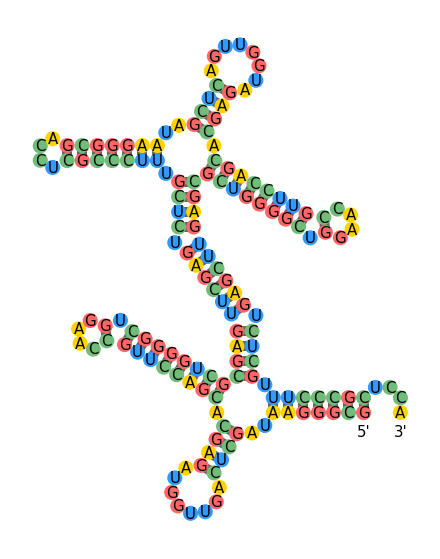

Wrote bpp to ./scratch/test_bpp_out.txt
Dumping (Inside-Outside) Forest to ./scratch/test_dump_forest.txt...
Outputting base pairs in bpseq format to ./scratch/mea_bpseq.txt...
Outputting base pairs in bpseq format to ./scratch/threshknot_bpseq.txt...


In [2]:
parser = BeamCKYParser(model_to_use='Vienna')
seq = 'GCGGGAAUAGCUCAGUUGGUAGAGCACGACCUUGCCAAGGUCGGGGUCGCGAGUUCGAGUCUCGUUUCCCGCUCCAGCGGGAAUAGCUCAGUUGGUAGAGCACGACCUUGCCAAGGUCGGGGUCGCGAGUUCGAGUCUCGUUUCCCGCUCCA'
parser.parse(seq)

print(f"Free Energy of Ensemble: { -kT * parser.model.log_partition_coeff() / 100.0 } kcal/mol")

# MEA structure:
structure = PairProb_MEA(parser.model, parser.gamma)
print(seq)
print(structure)
draw_struct(seq, structure)

# Base pairing probs
output_bpp_to_file(parser.model, './scratch/test_bpp_out.txt')

# Forest dump
dump_forest(parser.model, './scratch/test_dump_forest.txt', False)

# Output MEA structure into "bpseq" format
pairs_from_mea = dotbracket_to_pairs(structure)
output_bpseq('./scratch/mea_bpseq.txt', pairs_from_mea, seq)

# Threshknot, and output as bpseq:
tk_pairs = threshknot_pairs(parser.model, threshknot_threshold=parser.threshknot_threshold)
output_bpseq('./scratch/threshknot_bpseq.txt', tk_pairs, seq)

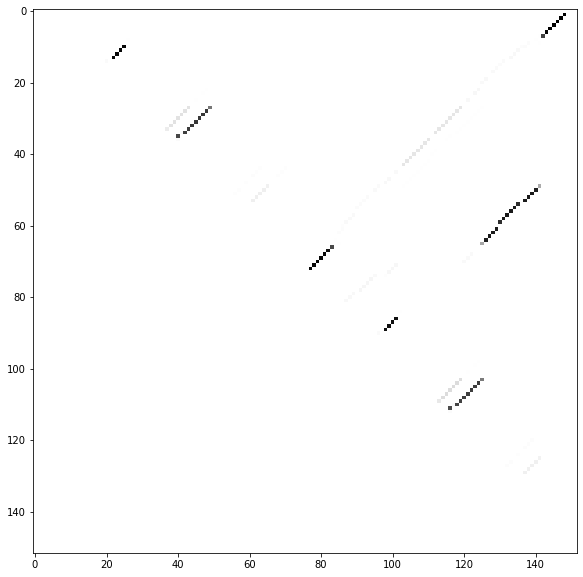

In [3]:
n = len(seq)
Pij = np.zeros((n,n))
for (i,j),p in parser.model.Pij.items():
    Pij[i][j] = p

fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(Pij, cmap='gist_yarg')